In [1]:
import aqdatac
aqdatac.login('huangchunyang', password='20020308hd')

In [2]:
aqdatac.current_session()

aqdatac: version 0.2.3
current user: huangchunyang
current session expires at: 2024-08-08 17:12:36


In [3]:
aqdatac.accessible_tables()

{'aindexcsi500weight': ['*'],
 'aindexhs300closeweight': ['*'],
 'aindexhs300freeweight': ['*'],
 'ashareeodprices': ['2009-01-01, 2019-12-31'],
 'cftick': ['2019-01-01,2019-07-01'],
 'cfuturescalendar': ['*'],
 'chinaetfpchredmlist': ['*'],
 'chinaetfpchredmmembers': ['*'],
 'csbar_1d': ['2009-01-01, 2019-12-31'],
 'csbar_30m': ['2015-01-01, 2019-12-31'],
 'csdate': ['*'],
 'csinfo': ['*'],
 'csord': ['2019-01-01,2019-07-01'],
 'cstick': ['2019-01-01,2019-07-01'],
 'cstra': ['2019-01-01,2019-07-01']}

In [4]:
import pandas as pd
start_date_str, end_date_str = "2019-05-06", "2019-05-06"
start_date, end_date = pd.to_datetime(start_date_str), pd.to_datetime(end_date_str)
symlist = ["000001.SZ"]  #list
df = aqdatac.get_data("cstick",start_date, end_date, symlist)

In [40]:
import datetime as dt
begin_t = dt.time(9, 31, 0)
df_t = df[df['time'] > begin_t]

In [41]:
df_open = df_t[df_t['ask9'] > 0]
print(len(df_t), len(df_open))

4785 4765


In [42]:
df_open.columns

Index(['date', 'time', 'sym', 'prevclose', 'open', 'high', 'low', 'close',
       'volume', 'turnover', 'tradecount', 'bid1', 'bsize1', 'bid2', 'bsize2',
       'bid3', 'bsize3', 'bid4', 'bsize4', 'bid5', 'bsize5', 'bid6', 'bsize6',
       'bid7', 'bsize7', 'bid8', 'bsize8', 'bid9', 'bsize9', 'bid10',
       'bsize10', 'ask1', 'asize1', 'ask2', 'asize2', 'ask3', 'asize3', 'ask4',
       'asize4', 'ask5', 'asize5', 'ask6', 'asize6', 'ask7', 'asize7', 'ask8',
       'asize8', 'ask9', 'asize9', 'ask10', 'asize10', 'avgbid', 'avgask',
       'totalbsize', 'totalasize', 'iopv'],
      dtype='object')

In [43]:
[column_ for column_ in df_open.columns if 'ask' in column_]

['ask1',
 'ask2',
 'ask3',
 'ask4',
 'ask5',
 'ask6',
 'ask7',
 'ask8',
 'ask9',
 'ask10',
 'avgask']

# 对于bid1 

In [44]:
base_line = df_open['bid1']
columns_list = [
    'bid2',
    'bid3',
    'bid4',
    'bid5',
    'bid6',
    'bid7',
    'bid8',
    'bid9',
    'bid10',
    'ask1',
    'ask2',
    'ask3',
    'ask4',
    'ask5',
    'ask6',
    'ask7',
    'ask8',
    'ask9',
    'ask10'
]

In [72]:
diff_best_price = ((df_open[columns_list].sub(base_line, axis=0)) * 100).round().astype(int)

In [59]:
from matplotlib import pyplot as plt

bid2
-5       2
-4       4
-3       9
-2      66
-1    4684
Name: count, dtype: int64


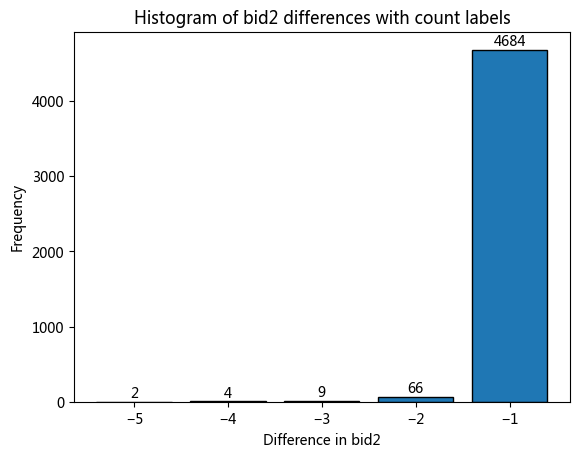

bid3
-7       1
-6       4
-5       7
-4      13
-3      74
-2    4666
Name: count, dtype: int64


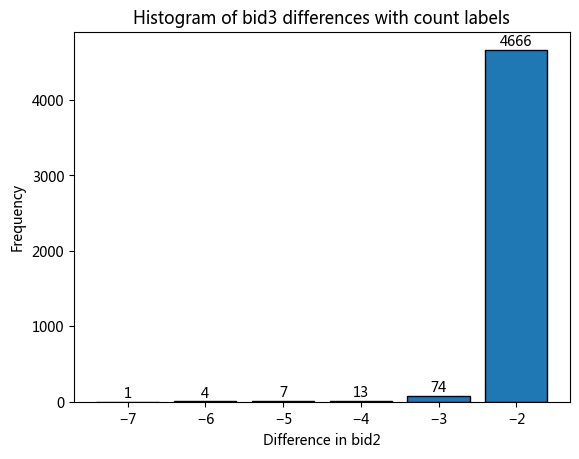

bid4
-8       1
-7       4
-6       7
-5      17
-4      87
-3    4649
Name: count, dtype: int64


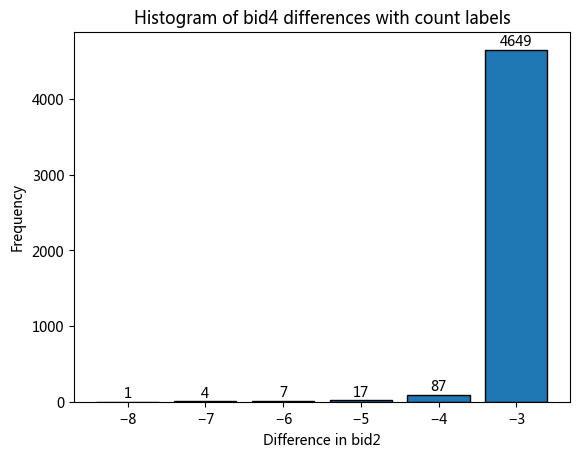

bid5
-9       1
-8       4
-7       7
-6      17
-5      98
-4    4638
Name: count, dtype: int64


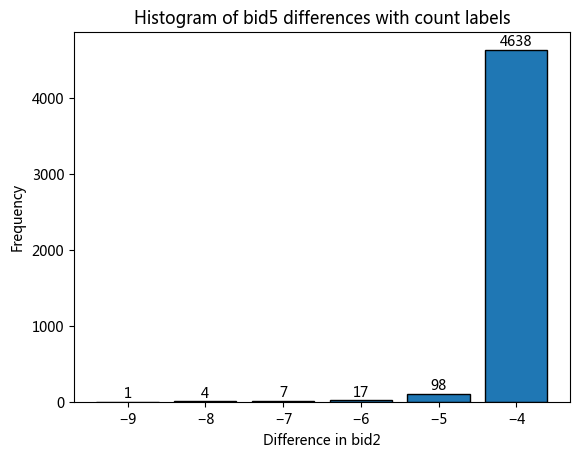

bid6
-10       1
-9        4
-8        7
-7       19
-6       97
-5     4637
Name: count, dtype: int64


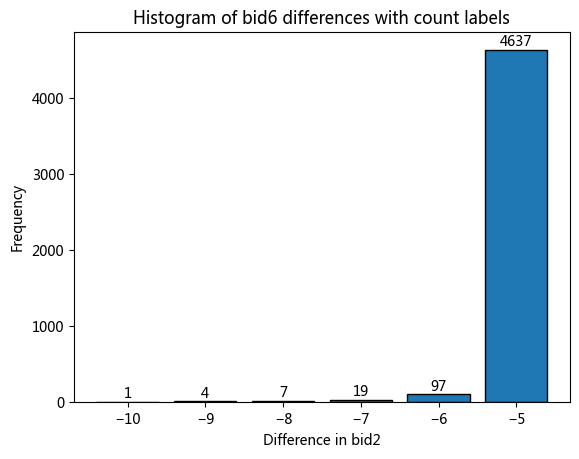

bid7
-11       1
-10       4
-9        7
-8       19
-7      101
-6     4633
Name: count, dtype: int64


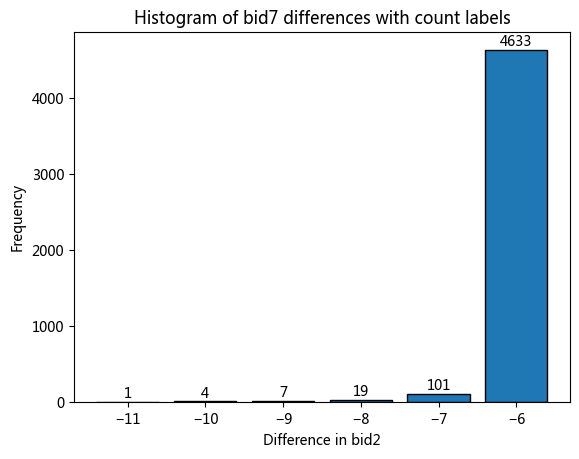

bid8
-12       1
-11       4
-10       7
-9       19
-8      102
-7     4632
Name: count, dtype: int64


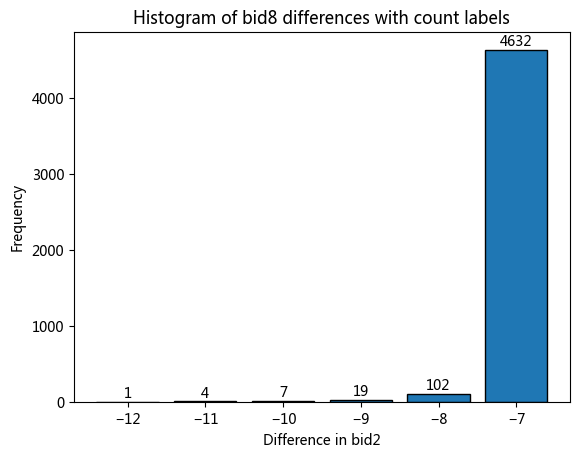

bid9
-13       1
-12       4
-11       7
-10      19
-9      102
-8     4632
Name: count, dtype: int64


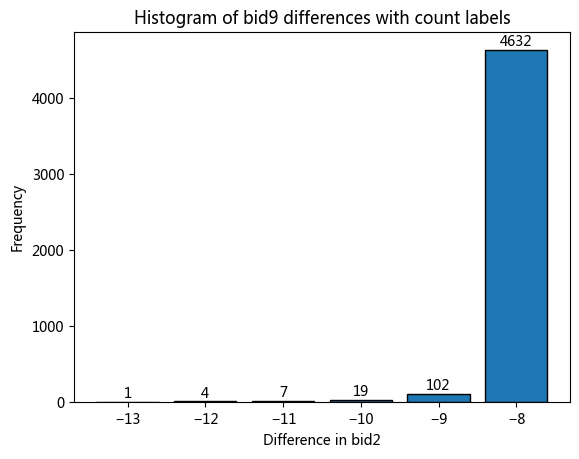

bid10
-14       1
-13       4
-12       7
-11      19
-10     102
-9     4632
Name: count, dtype: int64


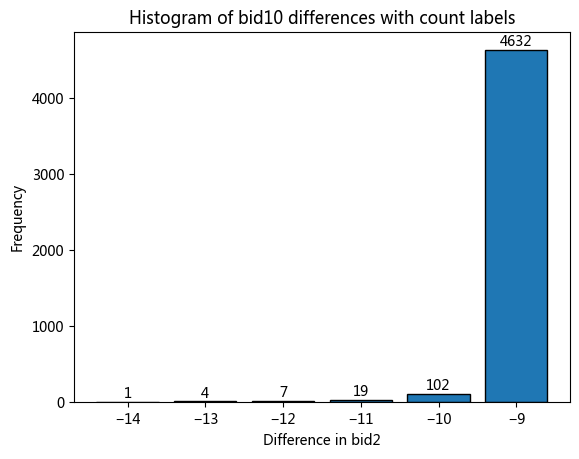

ask1
1    4384
2     287
3      67
4      17
5       6
6       1
7       3
Name: count, dtype: int64


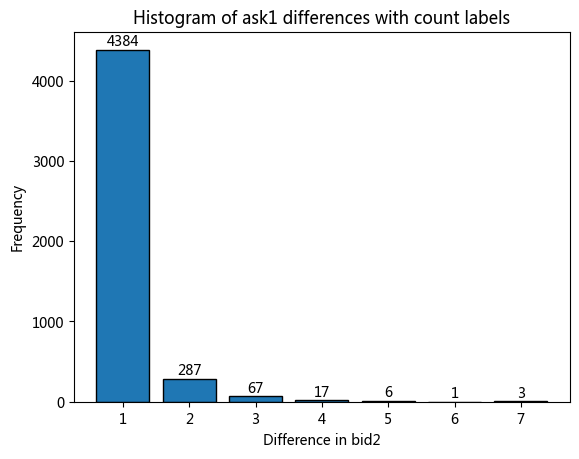

ask2
2    4228
3     365
4     134
5      26
6       7
7       1
8       4
Name: count, dtype: int64


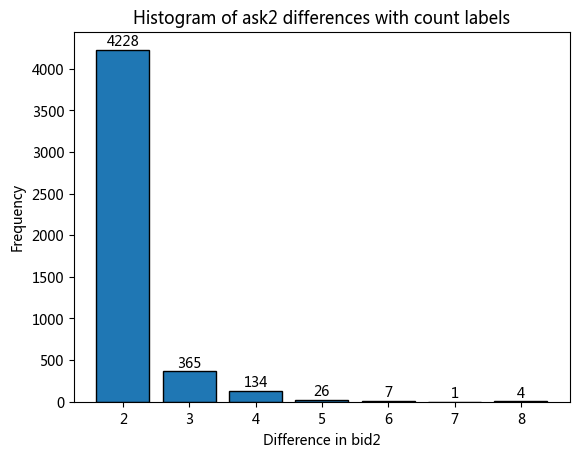

ask3
3    4049
4     531
5     111
6      61
7       7
8       2
9       4
Name: count, dtype: int64


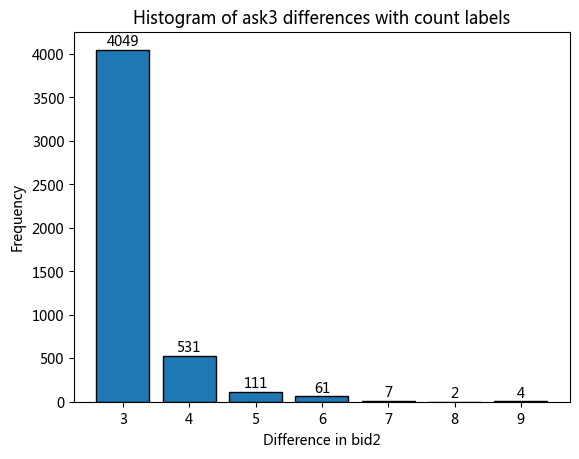

ask4
4     3951
5      617
6      122
7       62
8        7
9        2
10       4
Name: count, dtype: int64


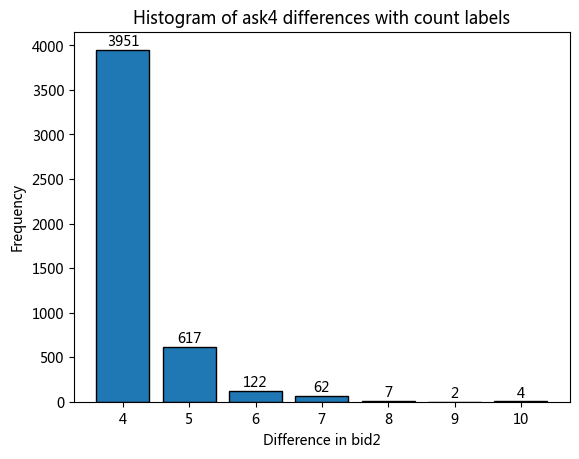

ask5
5     3900
6      656
7      129
8       62
9       12
10       2
11       4
Name: count, dtype: int64


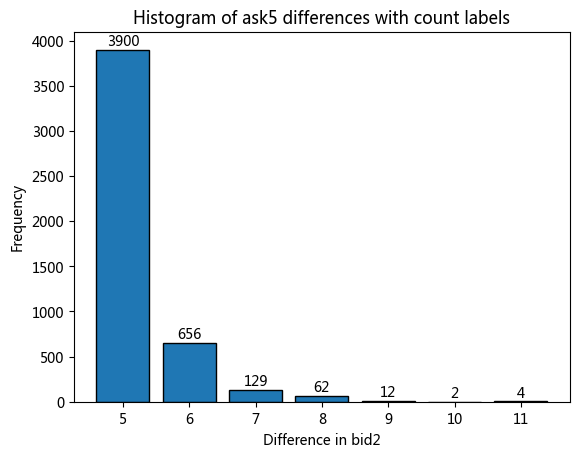

ask6
6     3856
7      687
8      138
9       62
10      15
11       3
12       4
Name: count, dtype: int64


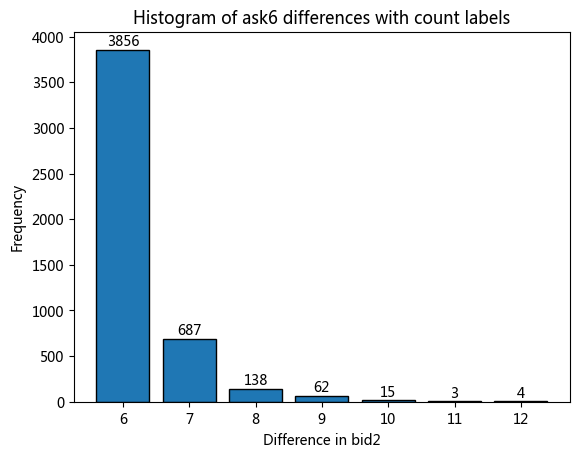

ask7
7     3819
8      717
9      143
10      62
11      17
12       3
13       4
Name: count, dtype: int64


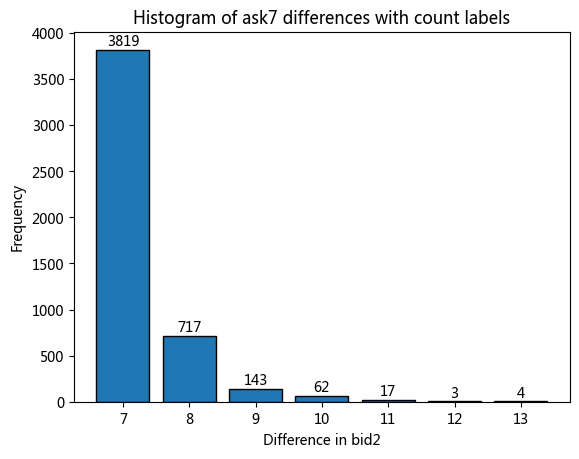

ask8
8     3772
9      763
10     144
11      61
12      18
13       3
14       4
Name: count, dtype: int64


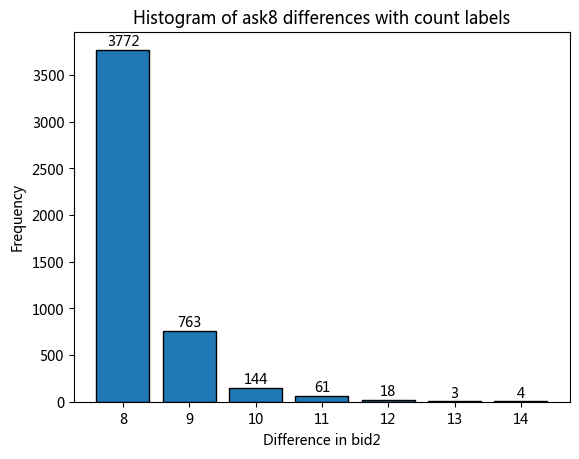

ask9
9     3710
10     820
11     149
12      61
13      18
14       3
15       4
Name: count, dtype: int64


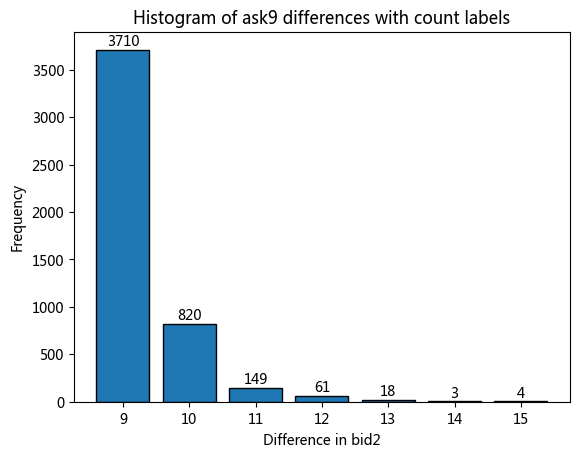

ask10
10    3693
11     821
12     164
13      62
14      18
15       3
16       4
Name: count, dtype: int64


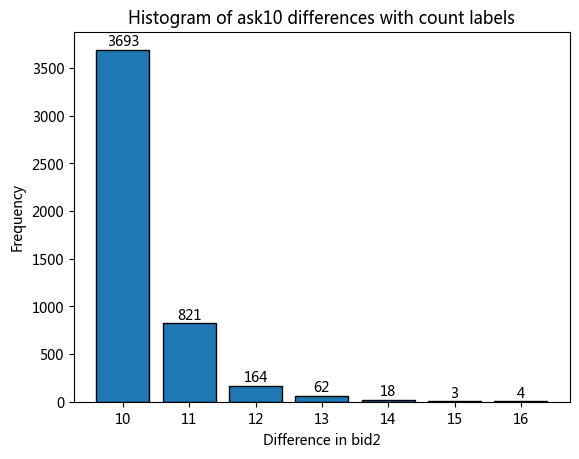

In [76]:
# 统计 bid2 差值的出现次数
for column in columns_list:
    counts = diff_best_price[column].value_counts().sort_index()
    print(counts)
    # 补全缺失的整数值
    full_range = range(counts.index.min(), counts.index.max() + 1)
    counts = counts.reindex(full_range, fill_value=0)
    
    # 绘制柱状图
    plt.bar(counts.index, counts.values, edgecolor='black')
    
    # 添加数量标签
    for index, value in counts.items():
        plt.text(index, value, str(value), ha='center', va='bottom')
    
    plt.xlabel('Difference in bid2')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column} differences with count labels')
    plt.xticks(full_range)  # 显示所有的整数标签
    plt.show()

In [10]:
df_1d = aqdatac.get_data("csbar_1d", start_date, end_date, sym_list) 

In [11]:
df_1d

,date,sym,prevclose,open,high,low,close,volume,turnover,tradecount,af,upperlimit,lowerlimit,ttlshr,fltshr,frshr
0,2019-01-02,000001.SZ,9.38,9.39,9.42,9.16,9.19,53938632.0,498695109.0,25140.0,108.031388,10.32,8.44,17170411366.0,17170246773.000002,7610290923.0
1,2019-01-02,000002.SZ,23.82,23.83,24.09,23.67,23.9,24701028.0,589384596.0,26541.0,142.667998,26.2,21.44,11039152001.0,9715170043.0,5546288780.0
2,2019-01-02,000004.SZ,16.03,16.05,16.24,16.01,16.06,142400.0,2290041.0,241.0,4.063862,17.63,14.43,83976684.0,82933609.0,50659161.0
3,2019-01-02,000005.SZ,2.68,2.69,2.7,2.66,2.67,2909600.0,7788443.0,1187.0,9.267603,2.95,2.41,1058536842.0,1057946242.0,825760487.0
4,2019-01-02,000006.SZ,5.18,5.18,5.25,5.1,5.15,6322964.0,32733636.0,2643.0,34.22615,5.7,4.66,1349995046.0,1347786178.0,862937030.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273071,2019-04-30,603991.SH,20.44,20.44,21.03,20.11,20.78,681690.0,14058426.0,1276.0,1.004439,22.48,18.4,74534998.0,41078918.0,24558995.0
273072,2019-04-30,603993.SH,4.17,4.15,4.25,4.12,4.21,69401815.0,291769895.0,23854.0,3.269446,4.59,3.75,21599240583.0,17665772583.0,7002772182.999999
273073,2019-04-30,603997.SH,9.03,9.03,9.8,8.86,9.65,5556826.0,52964769.0,7385.0,1.568806,9.93,8.13,639413200.0,630000000.0,150678503.0
273074,2019-04-30,603998.SH,9.88,9.84,10.3,9.84,10.01,22750376.0,228858699.0,16993.0,3.93414,10.87,8.89,436622720.0,425196720.0,379402445.0


In [12]:
df_1d_trade = df_1d[df_1d['volume']!=0]
df_1d_trade

,date,sym,prevclose,open,high,low,close,volume,turnover,tradecount,af,upperlimit,lowerlimit,ttlshr,fltshr,frshr
0,2019-01-02,000001.SZ,9.38,9.39,9.42,9.16,9.19,53938632.0,498695109.0,25140.0,108.031388,10.32,8.44,17170411366.0,17170246773.000002,7610290923.0
1,2019-01-02,000002.SZ,23.82,23.83,24.09,23.67,23.9,24701028.0,589384596.0,26541.0,142.667998,26.2,21.44,11039152001.0,9715170043.0,5546288780.0
2,2019-01-02,000004.SZ,16.03,16.05,16.24,16.01,16.06,142400.0,2290041.0,241.0,4.063862,17.63,14.43,83976684.0,82933609.0,50659161.0
3,2019-01-02,000005.SZ,2.68,2.69,2.7,2.66,2.67,2909600.0,7788443.0,1187.0,9.267603,2.95,2.41,1058536842.0,1057946242.0,825760487.0
4,2019-01-02,000006.SZ,5.18,5.18,5.25,5.1,5.15,6322964.0,32733636.0,2643.0,34.22615,5.7,4.66,1349995046.0,1347786178.0,862937030.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273071,2019-04-30,603991.SH,20.44,20.44,21.03,20.11,20.78,681690.0,14058426.0,1276.0,1.004439,22.48,18.4,74534998.0,41078918.0,24558995.0
273072,2019-04-30,603993.SH,4.17,4.15,4.25,4.12,4.21,69401815.0,291769895.0,23854.0,3.269446,4.59,3.75,21599240583.0,17665772583.0,7002772182.999999
273073,2019-04-30,603997.SH,9.03,9.03,9.8,8.86,9.65,5556826.0,52964769.0,7385.0,1.568806,9.93,8.13,639413200.0,630000000.0,150678503.0
273074,2019-04-30,603998.SH,9.88,9.84,10.3,9.84,10.01,22750376.0,228858699.0,16993.0,3.93414,10.87,8.89,436622720.0,425196720.0,379402445.0


In [13]:
sym_list_top100 = df_1d_trade[['sym', 'turnover']].groupby('sym').mean().nlargest(100, 'turnover').index

In [14]:
sym_list_top100

Index(['601318.SH', '600030.SH', '300059.SZ', '000725.SZ', '000063.SZ',
       '600519.SH', '000858.SZ', '000651.SZ', '600352.SH', '600776.SH',
       '601688.SH', '600837.SH', '600036.SH', '002230.SZ', '000333.SZ',
       '600604.SH', '000002.SZ', '600570.SH', '000977.SZ', '601066.SH',
       '300017.SZ', '600536.SH', '601166.SH', '600050.SH', '600518.SH',
       '600516.SH', '002456.SZ', '600309.SH', '000723.SZ', '002027.SZ',
       '600887.SH', '600048.SH', '300136.SZ', '601668.SH', '000001.SZ',
       '002415.SZ', '601398.SH', '601099.SH', '600895.SH', '603799.SH',
       '601108.SH', '600276.SH', '600460.SH', '300498.SZ', '601186.SH',
       '603019.SH', '000735.SZ', '600031.SH', '601288.SH', '600703.SH',
       '600446.SH', '000750.SZ', '600487.SH', '600585.SH', '002565.SZ',
       '000050.SZ', '603000.SH', '002195.SZ', '601319.SH', '002405.SZ',
       '600572.SH', '002157.SZ', '002547.SZ', '600104.SH', '600928.SH',
       '002460.SZ', '000776.SZ', '601336.SH', '601989.SH', '6012

In [15]:
df_train = df_1d_trade[df_1d_trade['sym'].isin(sym_list_top100)]
df_train['date'] = pd.to_datetime(df_train['date'])
df_train

/tmp/ipykernel_3122073/2542119992.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['date'] = pd.to_datetime(df_train['date'])


,date,sym,prevclose,open,high,low,close,volume,turnover,tradecount,af,upperlimit,lowerlimit,ttlshr,fltshr,frshr
0,2019-01-02,000001.SZ,9.38,9.39,9.42,9.16,9.19,53938632.0,498695109.0,25140.0,108.031388,10.32,8.44,17170411366.0,17170246773.000002,7610290923.0
1,2019-01-02,000002.SZ,23.82,23.83,24.09,23.67,23.9,24701028.0,589384596.0,26541.0,142.667998,26.2,21.44,11039152001.0,9715170043.0,5546288780.0
37,2019-01-02,000050.SZ,9.81,9.85,9.86,9.59,9.6,8828265.0,85673584.0,5719.0,8.281484,10.79,8.83,2048123051.0,1400988944.0,820059706.0
45,2019-01-02,000063.SZ,19.59,19.6,20.06,19.4,19.56,64968272.0,1280972083.0,59591.0,15.787475,21.55,17.63,4192671843.0,3433568341.0,2163738008.0
50,2019-01-02,000070.SZ,7.1,7.04,7.81,7.02,7.81,36973641.0,286532911.0,16786.0,2.874725,7.81,6.39,626994746.0,600361604.0,346426312.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272597,2019-04-30,601939.SH,7.41,7.35,7.47,7.33,7.44,112930803.0,836065696.0,27697.0,1.693219,8.15,6.67,250010977486.0,9593657606.0,8901075830.0
272608,2019-04-30,601989.SH,5.53,5.53,5.73,5.51,5.67,119547707.0,673595596.0,39529.0,1.682268,6.08,4.98,22879793243.0,18361665066.0,8561075448.0
272616,2019-04-30,603000.SH,22.0,21.13,22.05,20.28,21.29,43743613.0,926190353.0,49340.0,4.129292,24.2,19.8,1105691056.0,1105691056.0,471653991.0
272633,2019-04-30,603019.SH,41.02,41.0,41.8,40.02,40.48,19391858.0,794126147.0,28508.0,2.828852,45.12,36.92,900291206.0,900291206.0,668680378.0


In [17]:
df_train_sort = df_train.sort_values(by=['sym', 'date'])
df_train_sort

,date,sym,prevclose,open,high,low,close,volume,turnover,tradecount,af,upperlimit,lowerlimit,ttlshr,fltshr,frshr
0,2019-01-02,000001.SZ,9.38,9.39,9.42,9.16,9.19,53938632.0,498695109.0,25140.0,108.031388,10.32,8.44,17170411366.0,17170246773.000002,7610290923.0
3434,2019-01-03,000001.SZ,9.19,9.18,9.33,9.15,9.28,41553795.0,384457707.0,19151.0,108.031388,10.11,8.27,17170411366.0,17170246773.000002,7610290923.0
6869,2019-01-04,000001.SZ,9.28,9.24,9.82,9.22,9.75,148115906.0,1422149888.0,59551.0,108.031388,10.21,8.35,17170411366.0,17170246773.000002,7610290923.0
10304,2019-01-07,000001.SZ,9.75,9.84,9.85,9.63,9.74,86568766.0,841166430.0,34912.0,108.031388,10.73,8.78,17170411366.0,17170246773.000002,7610290923.0
13739,2019-01-08,000001.SZ,9.74,9.73,9.74,9.62,9.66,40238811.0,389247795.0,21454.0,108.031388,10.71,8.77,17170411366.0,17170246773.000002,7610290923.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259070,2019-04-24,603799.SH,36.78,36.78,37.57,36.65,37.26,22425232.0,831883228.0,36863.0,1.416557,40.46,33.1,829747285.0,819881192.0,480111232.0
262545,2019-04-25,603799.SH,37.26,37.13,37.13,35.21,35.47,27247574.0,986136333.0,48905.0,1.416557,40.99,33.53,829747285.0,819881192.0,480111232.0
266021,2019-04-26,603799.SH,35.47,35.56,35.89,34.11,34.27,24197039.0,839364829.0,43297.0,1.416557,39.02,31.92,829747285.0,819881192.0,480111232.0
269497,2019-04-29,603799.SH,34.27,31.86,31.86,30.84,30.84,12293300.0,382630613.0,19850.0,1.416557,37.7,30.84,829747285.0,819881192.0,480111232.0


In [21]:
# df_train_sort.groupby('sym')['volume'].rolling(window=5, min_periods=1).mean().reset_index(level=0, drop=True)
df_train_sort['volume_prev_5d_avg'] = df_train_sort.groupby('sym')['volume'].apply(lambda x: x.shift(1).rolling(window=5, min_periods=1).mean()).reset_index(level=0, drop=True)

In [25]:
df_train_sort_dropna = df_train_sort.dropna()

In [26]:
df_train_sort_dropna[['date', 'sym', 'volume', 'volume_prev_5d_avg']].to_csv('./train_set.csv')

In [29]:
volume = df_train_sort_dropna['volume']
volume_prev_5d_avg = df_train_sort_dropna['volume_prev_5d_avg']
delta_volume = (volume_prev_5d_avg - volume) / volume
delta_volume_percent = round(delta_volume * 100, 2)

In [37]:
df_train_sort_dropna.iloc[delta_volume_percent.argmax()-5: delta_volume_percent.argmax()+2]

,date,sym,prevclose,open,high,low,close,volume,turnover,tradecount,af,upperlimit,lowerlimit,ttlshr,fltshr,frshr,volume_prev_5d_avg
98937,2019-02-18,600604.SH,7.53,7.68,8.06,7.51,7.95,128658067.0,999692602.0,63764.0,52.406501,8.28,6.78,1873304804.0,1334184708.0,562989292.0,103486723.6
102390,2019-02-19,600604.SH,7.95,7.9,8.37,7.75,8.33,166773216.0,1351159322.0,83453.0,52.406501,8.75,7.16,1873304804.0,1334184708.0,562989292.0,114202309.0
105843,2019-02-20,600604.SH,8.33,8.2,8.3,8.0,8.17,107743016.0,878652105.0,54765.0,52.406501,9.16,7.5,1873304804.0,1334184708.0,562989292.0,130857095.8
109296,2019-02-21,600604.SH,8.17,8.17,8.99,8.12,8.73,218668109.0,1895352666.0,96948.0,52.406501,8.99,7.35,1873304804.0,1334184708.0,562989292.0,132637766.0
112750,2019-02-22,600604.SH,8.73,8.59,9.6,8.55,9.6,142627075.0,1329802947.0,43821.0,52.406501,9.6,7.86,1873304804.0,1334184708.0,562989292.0,148220689.4
116205,2019-02-25,600604.SH,9.6,10.56,10.56,10.56,10.56,3099913.0,32735081.0,1550.0,52.406501,10.56,8.64,1873304804.0,1334184708.0,562989292.0,152893896.6
119661,2019-02-26,600604.SH,10.56,11.62,11.62,11.26,11.62,88176782.0,1021941080.0,18664.0,52.406501,11.62,9.5,1873304804.0,1334184708.0,562989292.0,127782265.8


raw:  7715 sorted:  7658


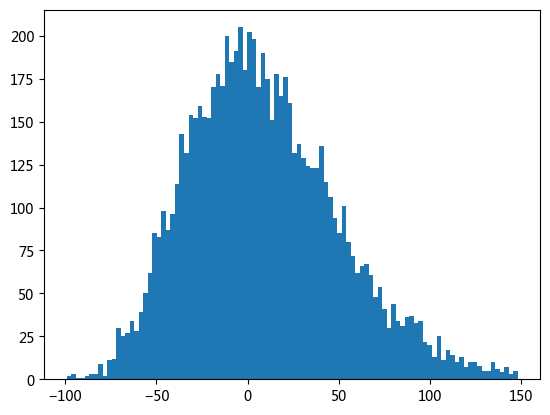

In [42]:
from matplotlib import pyplot as plt
sort = delta_volume_percent < 150
print('raw: ', len(delta_volume_percent), 'sorted: ', len(delta_volume_percent[sort]))
plt.hist(delta_volume_percent[sort], bins=100)
plt.show()